# Deep Clustering Demonstration
This notebook demonstrates the **embedded- and separated-AE-clustering** approach in an illustrative, step-by-step fashion on an example dataset.

In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
from IPython.display import Image
import tensorflow.keras as keras

from src.pipeline.deep_clustering import DeepClusteringModel, DataPreprocessor

## 1) Initialise and Download Data
We demonstrate the workflow on an example dataset from kaggle, that describes tree observations from a large forest area in Colorado (https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset).

In [2]:
# file paths:
ROOT = Path().resolve().parent
DATA = ROOT / "data" / "forest_data"  # input data
PLOTS = ROOT / "output" / "plots"  # output path for generated plots
LOG_DIR = ROOT / "output" / "training_log"  # output path for model training log
DEC_SAVE_DIR = ROOT / "data" / "saved_dec_models"  # path to save or load models

In [36]:
# plot settings:
PLOT_SIZE = (16, 10)
SAVEFIG = False
sns.set_context('notebook')
sns.set_style("white")

In [4]:
# load data:
df = pd.read_csv(DATA / "covtype.csv", nrows=2000)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2633,285,26,153,74,1168,139,229,226,721,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
1996,2510,323,21,30,12,1454,163,214,188,1752,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1997,2003,355,6,0,0,127,211,230,157,283,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1998,2143,170,32,247,124,547,223,234,116,258,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


## 2) Preprocessing
Now, we **process and explore the data** using the *DataPreproccesor class* from deep_clustering.py.

### 2.1) Data Processing
**Convert dataset in the required format** and provide an **overview of underlying features and systems**.

The Preprocessor class requires the *summary table* and further global arguments from 1) that specify
- whether, where and how to *save plots*

In [5]:
df_preprocessor = DataPreprocessor(data=df, save_fig=SAVEFIG, plot_path=PLOTS,
                                              plot_size=PLOT_SIZE)
df_preprocessor

-- Preprocessor Object --

Amount of objects: 2000

Included features: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']

In [6]:
df_preprocessor.data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.0,2000.000000,2000.000000,2000.0,2000.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.0,2000.0,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.0,2000.000000,2000.000000,2000.000000,2000.0,2000.0,2000.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0,2000.0,2000.0,2000.0,2000.000000,2000.00000,2000.000000,2000.000000
mean,2894.813000,133.926000,13.902000,222.661500,38.874000,2743.085500,219.25700,217.723000,128.357500,2470.935000,0.933500,0.0,0.045000,0.02150,0.003500,0.000500,0.0,0.001000,0.016000,0.0,0.0,0.000500,0.003000,0.003000,0.002000,0.088000,0.00150,0.0,0.0,0.01250,0.001000,0.023000,0.008000,0.03950,0.0,0.040500,0.084000,0.015500,0.0,0.0,0.0,0.001000,0.415500,0.182500,0.001000,0.005500,0.018000,0.0,0.0,0.0,0.0,0.017500,0.01250,0.003500,2.843500
std,233.116052,105.504944,8.484185,172.381674,49.748443,1929.001563,22.37459,23.644509,43.823555,1518.617143,0.249216,0.0,0.207356,0.14508,0.059072,0.022361,0.0,0.031615,0.125506,0.0,0.0,0.022361,0.054704,0.054704,0.044688,0.283366,0.03871,0.0,0.0,0.11113,0.031615,0.149941,0.089107,0.19483,0.0,0.197178,0.277457,0.123561,0.0,0.0,0.0,0.031615,0.492931,0.386353,0.031615,0.073976,0.132984,0.0,0.0,0.0,0.0,0.131158,0.11113,0.059072,1.803783
min,2000.000000,0.000000,0.000000,0.000000,-134.000000,67.000000,100.00000,99.000000,0.000000,60.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,1.000000
25%,2744.000000,57.000000,7.000000,90.000000,5.000000,849.000000,209.00000,208.000000,107.000000,1489.000000,1.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,2.000000
50%,2907.000000,90.000000,12.000000,190.000000,23.000000,2758.000000,224.00000,223.000000,134.000000,2140.000000,1.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,2.000000
75%,3052.500000,198.500000,18.000000,319.000000,60.000000,4542.750000,234.00000,234.000000,156.000000,2919.500000,1.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,5.000000
max,3404.000000,35

Here, we demonstratively remove some rows with IQR outlier removal. With the present dataset however that's likely unnecessary.

In [7]:
df_preprocessor.remove_outliers_by_iqr(quantile=(0.001, 0.999))

### 2.2) Feature Extraction and Selection

#### Standardization

In [38]:
df_preprocessor.standardize()

#### Feature Selection

Deleted each row where at least one feature contains NaNs.
Calculating 10 principal components...


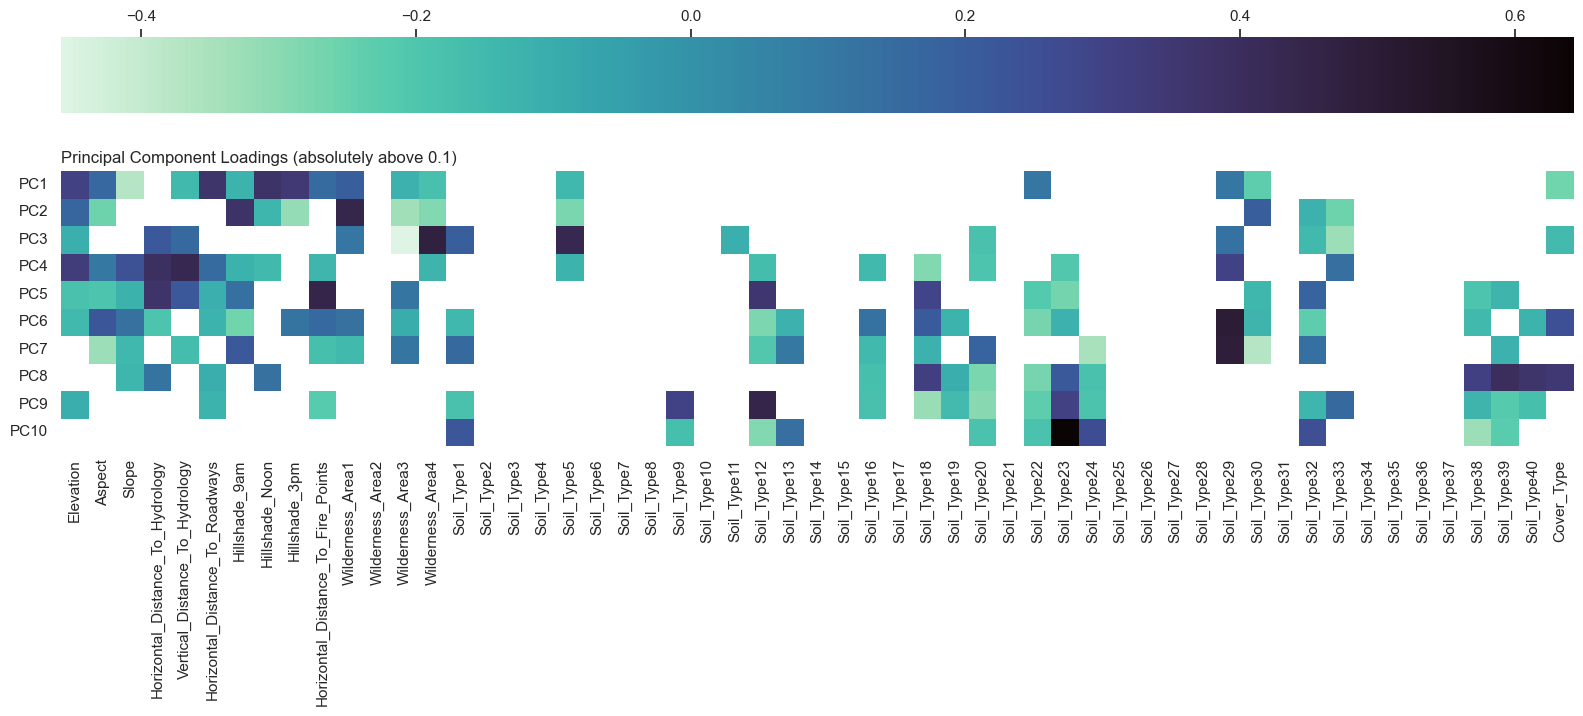

In [9]:
# PCA to detect redundancies / correlations:
df_preprocessor.calculate_pca(no_of_components=10)
df_preprocessor.plot_loadings_heatmap_pca(threshold=0.1)

In [10]:
# df_preprocessor.remove_features(['Soil_Type39'])  # example

### 2.3) Data Visualization

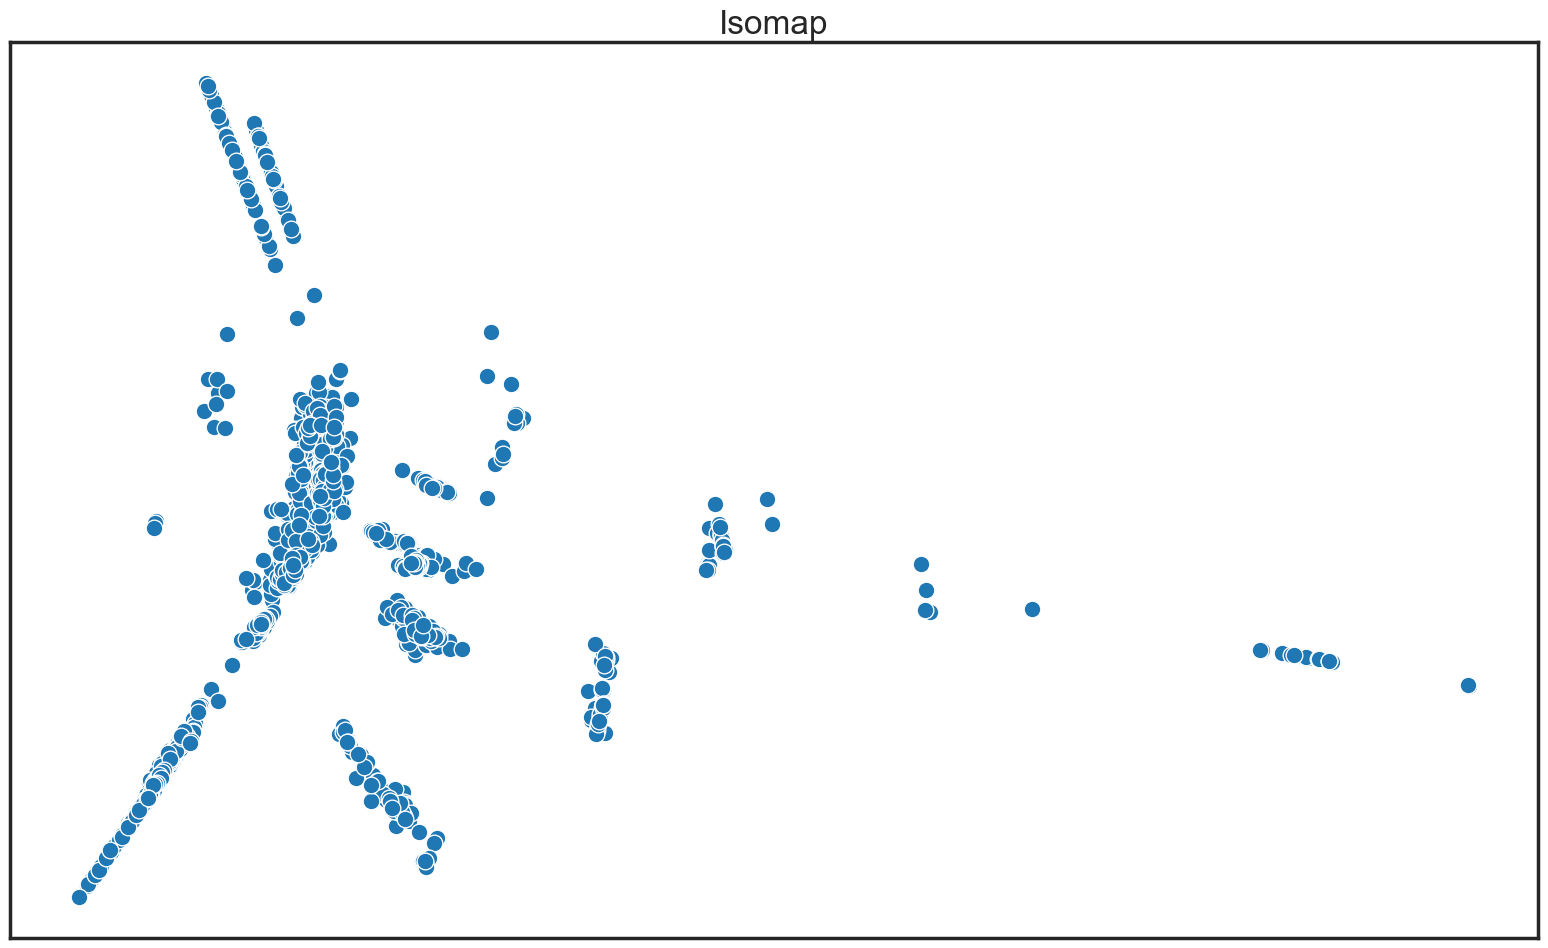

In [37]:
sns.set_context('poster')  # for this plot it is recommended to increase display size

df_preprocessor.plot_isomap_overview(n_neighbors=15)

sns.set_context('notebook')  # restore standard

## 3) Deep Clustering

### 3.1) Initialise Model

In [22]:
input_frame = df_preprocessor.standardized_data.copy()

Either from parameters:

In [13]:
dec_model = DeepClusteringModel(n_clusters=3, n_input_features=input_frame.shape[1],
                                n_latent_features=15, n_ae_layers=15,
                                encoder_activation="relu", decoder_activation="relu",
                                sparsity_constraint='L1+L2')


Or from .keras model file:

In [39]:
# dec_model = DeepClusteringModel(DEC_SAVE_DIR/"20250104 DEC Model clusters3 loss0.13 silh0.30956902400539443 dunn0.15763209765844774.keras")

Print model summary:

In [10]:
dec_model

Model: "DECModel"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 55)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_layers      │ (None, 15)        │     20,495 │ input_layer[0][0] │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_layers      │ (None, 55)        │     20,535 │ encoder_layers[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cluster_layer       │ (None, 3)         │         45 │ encoder_layers[0… │
│ (ClusteringLayer)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 41,167 (160.81 KB)

 Trainable params: 45 (180.00 B)

 Non-trainable params: 41,030 (160.27 KB)

 Optimizer params: 92 (372.00 B)

DEC Model with 3 clusters, 55 input- and 15 latent features.

### 3.2) Pretrain AE

In [17]:
dec_model.pretrain_autoencoder(input_frame, DEC_SAVE_DIR, epochs=10000, verbose=0, batch_size=128)

Pretraining autoencoder...
Saving AE model to /Users/paulrusing/Library/Mobile Documents/com~apple~CloudDocs/PR iCloud/Work/Personal/Programming/Github Repos/deep-clustering/data/saved_dec_models...
Done! Final loss: 0.09


In [40]:
# or load a pre-trained model
# dec_model.autoencoder = keras.models.load_model(DEC_SAVE_DIR/"20250104 AE Model features15 loss0.09.keras")

### 3.3) Clustering

#### 3.3.1) Separated Clustering
For the separated approach we can now leverage any cluster algorithm to cluster the objects based on the latent representation. Note, that *also for the embedded approach*, it is desirable to initialise the cluster assignments in a similar manner.

In [41]:
# initiliase cluster weights (with k-means) as starting point:
dec_model.init_cluster_weights(input_frame)

Initialising cluster weights...
Done!


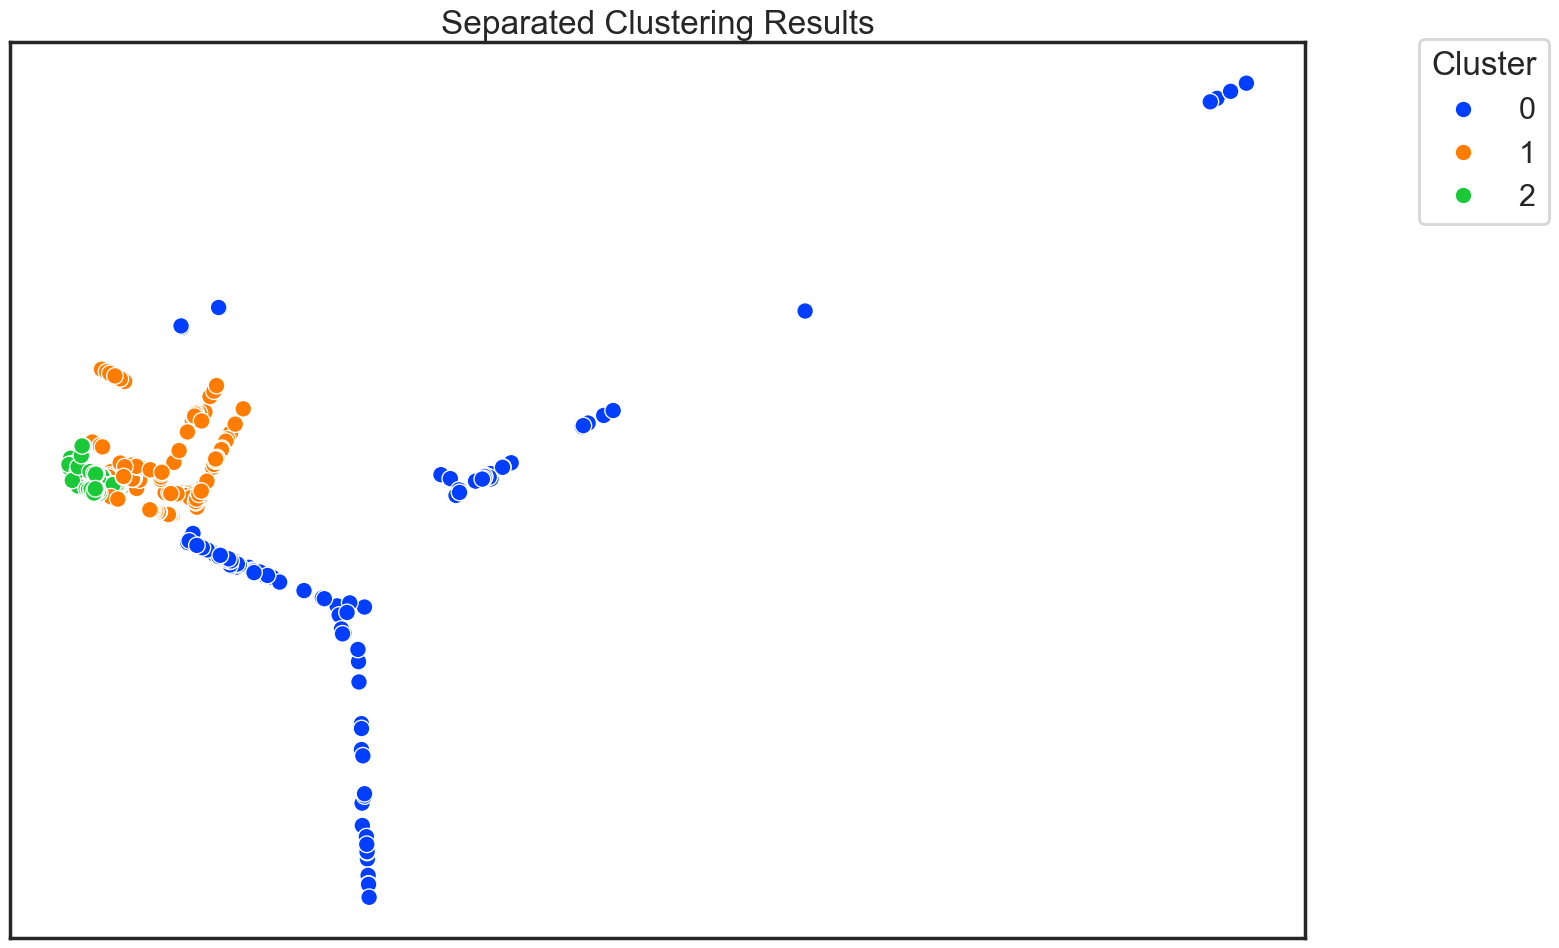

In [42]:
sns.set_context('poster')
dec_model.isomap_plot(input_frame, title='Separated Clustering Results')
sns.set_context('notebook')

At this point we could read out the cluster labels, if we are satisfied with the **separated clustering approach**.

In [43]:
separated_cluster_labels = pd.Series(data=dec_model.predict(input_frame), index=input_frame.index, name='Cluster Label')
separated_cluster_labels

0       2
1       2
2       2
3       2
4       2
       ..
1994    1
1995    2
1996    0
1998    2
1999    1
Name: Cluster Label, Length: 1990, dtype: int64

#### 3.3.2) Embedded Clustering
With the embedded approach, we go one step further, training the AE and clustering layer jointly.

In [23]:
# compile model (setting optimizer and cluster loss weight)
dec_model.compile(cluster_loss_weight=3)

In [25]:
# first step: train with autoencoder
dec_model.fit(input_frame, log_dir=LOG_DIR, save_dir=DEC_SAVE_DIR,
                 epochs=1000, verbose=0, tol=0.002, patience=8, save_epochs=250,
                 freeze_autoencoder=False)

Training model for 1000 epochs...


  0%|          | 0/1000 [00:00<?, ?it/s]

Saving interim DEC model to /Users/paulrusing/Library/Mobile Documents/com~apple~CloudDocs/PR iCloud/Work/Personal/Programming/Github Repos/deep-clustering/data/saved_dec_models...
Assignment changes 0.0005025125628140704 below 0.002. Patience: 1 of 8.
Assignment changes 0.0005025125628140704 below 0.002. Patience: 2 of 8.
Assignment changes 0.0 below 0.002. Patience: 3 of 8.
Assignment changes 0.0 below 0.002. Patience: 4 of 8.
Assignment changes 0.0 below 0.002. Patience: 5 of 8.
Assignment changes 0.0 below 0.002. Patience: 6 of 8.
Assignment changes 0.0 below 0.002. Patience: 7 of 8.
Assignment changes 0.0 below 0.002. Patience: 8 of 8.
Reached max. patience. Training finished!
Reached maximum number of epochs. Training finished!
Saving final DEC model to /Users/paulrusing/Library/Mobile Documents/com~apple~CloudDocs/PR iCloud/Work/Personal/Programming/Github Repos/deep-clustering/data/saved_dec_models...


In [27]:
# second step: train without autoencoder and with higher patience for fewer epochs ("fine-tuning")
# if visualize_dir is provided, an isomap clustering overview is plotted every save_epochs and saved to that directory
dec_model.fit(input_frame, log_dir=LOG_DIR, save_dir=DEC_SAVE_DIR,
                 epochs=1000, verbose=0, tol=0.001, patience=10,
                 visualize_dir=LOG_DIR / "250104_training_visualization",
                 freeze_autoencoder=True)

Only training cluster layer.
Training model for 1000 epochs...


  0%|          | 0/1000 [00:00<?, ?it/s]

Saving interim DEC model to /Users/paulrusing/Library/Mobile Documents/com~apple~CloudDocs/PR iCloud/Work/Personal/Programming/Github Repos/deep-clustering/data/saved_dec_models...
Assignment changes 0.0 below 0.001. Patience: 1 of 10.
Assignment changes 0.0 below 0.001. Patience: 2 of 10.
Assignment changes 0.0 below 0.001. Patience: 3 of 10.
Assignment changes 0.0 below 0.001. Patience: 1 of 10.
Assignment changes 0.0 below 0.001. Patience: 2 of 10.
Assignment changes 0.0 below 0.001. Patience: 3 of 10.
Assignment changes 0.0 below 0.001. Patience: 4 of 10.
Assignment changes 0.0 below 0.001. Patience: 5 of 10.
Saving interim DEC model to /Users/paulrusing/Library/Mobile Documents/com~apple~CloudDocs/PR iCloud/Work/Personal/Programming/Github Repos/deep-clustering/data/saved_dec_models...
Assignment changes 0.0 below 0.001. Patience: 6 of 10.
Assignment changes 0.0 below 0.001. Patience: 1 of 10.
Assignment changes 0.0005025125628140704 below 0.001. Patience: 2 of 10.
Assignment chan

Here, we can now read out the **embedded clustering** results.

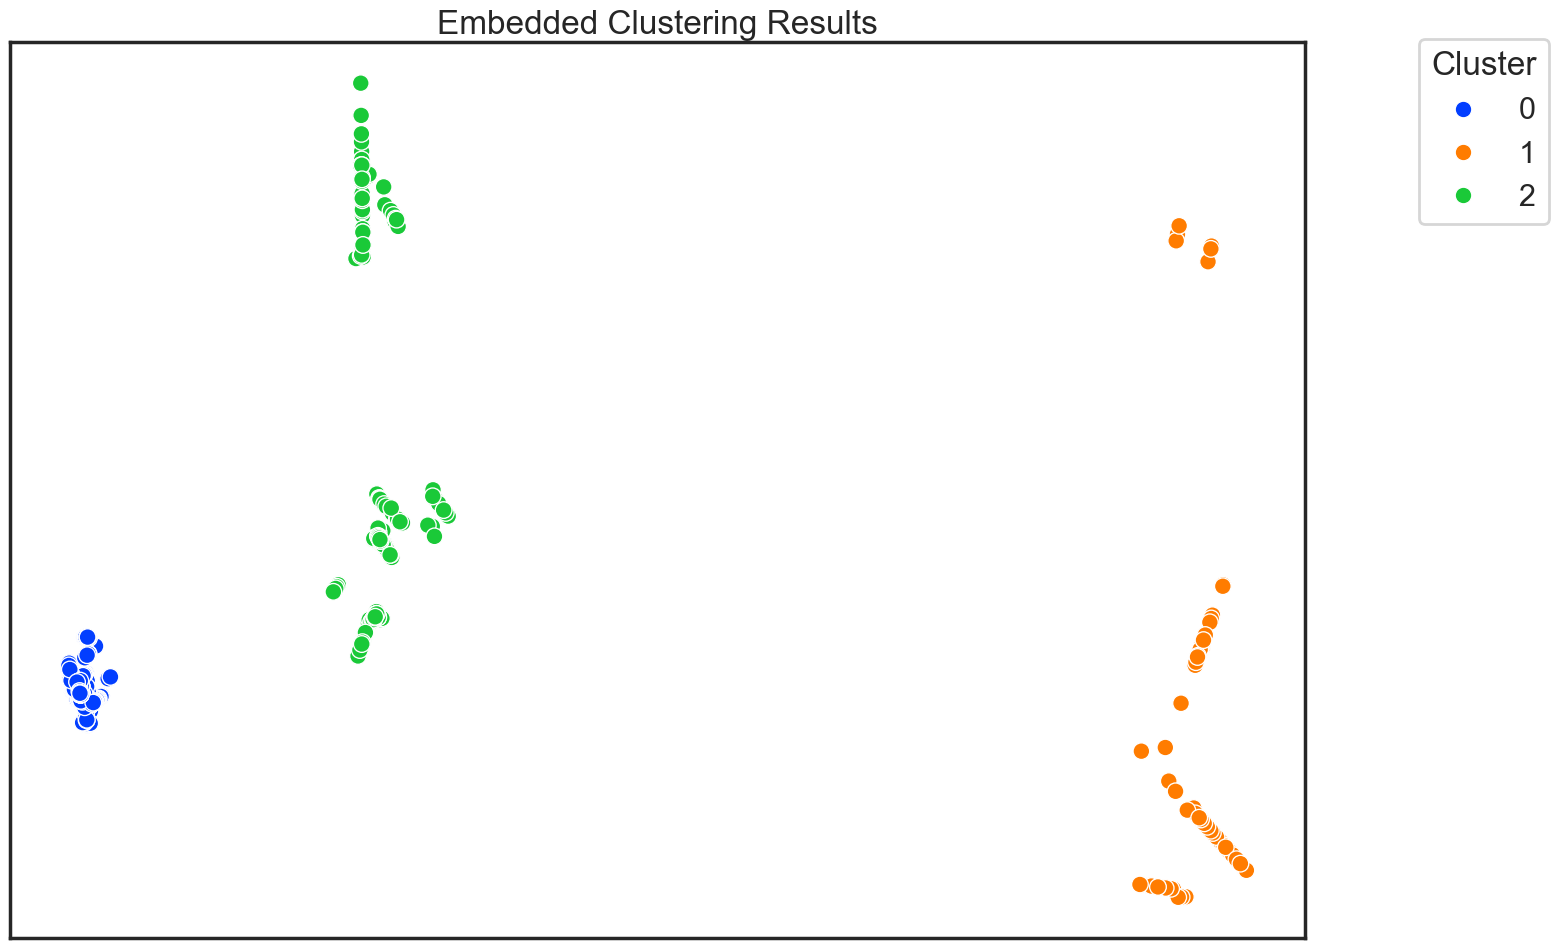

In [32]:
sns.set_context('poster')
dec_model.isomap_plot(input_frame, title='Embedded Clustering Results')
sns.set_context('notebook')

In [34]:
embedded_cluster_labels = pd.Series(data=dec_model.predict(input_frame), index=input_frame.index, name='Cluster Label')
embedded_cluster_labels

0       0
1       0
2       0
3       0
4       0
       ..
1994    2
1995    0
1996    1
1998    0
1999    2
Name: Cluster Label, Length: 1990, dtype: int64

### 3.1.4) Training Evaluation
Evaluation methods to gauge the training process.

Optimal (min) value for L found at 3.
Optimal (min) value for MSE_L found at 3.
Optimal (min) value for KLD_L found at 3.
Optimal (min) value for Label_Changes found at 3.
Optimal (max) value for Silh_Coeff found at 1.
Optimal (max) value for Dunn_Index found at 0.


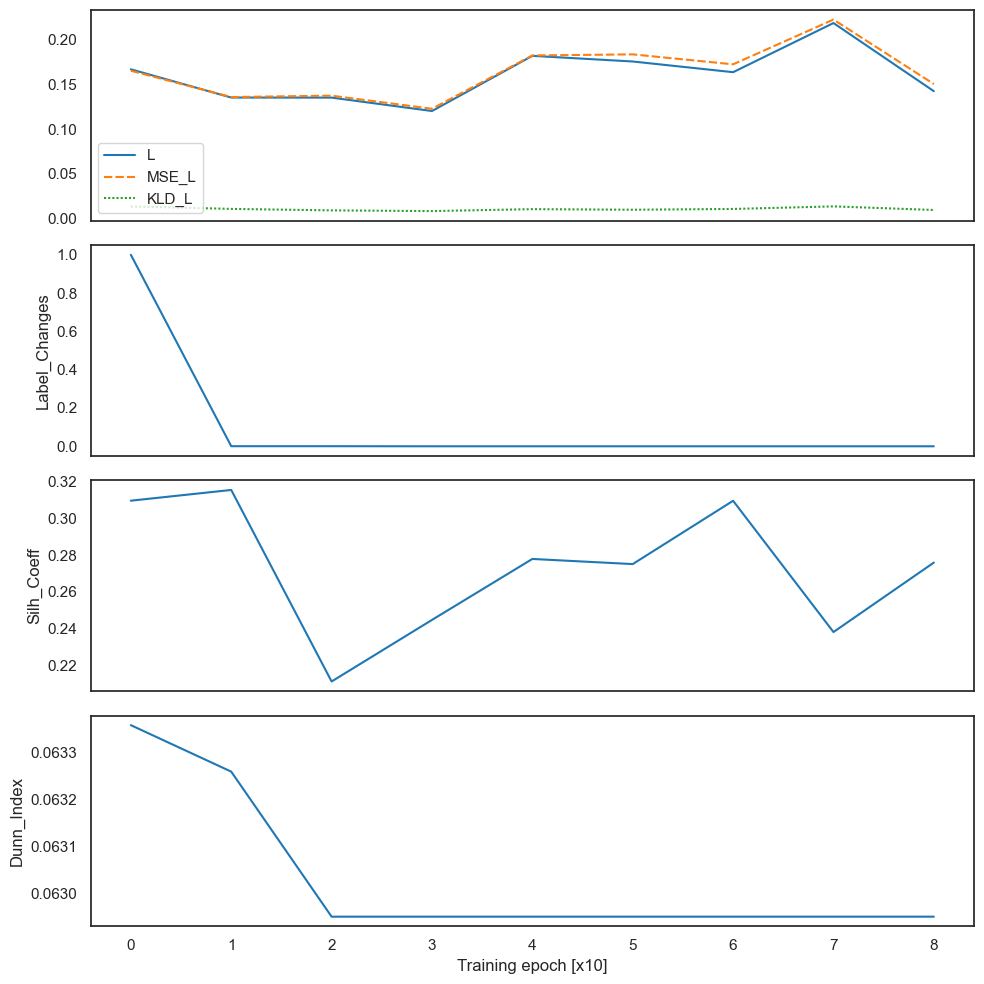

In [15]:
dec_model.plot_log_evaluation(LOG_DIR / "20250104 15_39_07 DEC LOG.csv", smoothing_window=1)

Optimal (min) value for L found at 18.
Optimal (min) value for MSE_L found at 3.
Optimal (min) value for KLD_L found at 22.
Optimal (min) value for Label_Changes found at 1.
Optimal (max) value for Silh_Coeff found at 2.
Optimal (max) value for Dunn_Index found at 16.


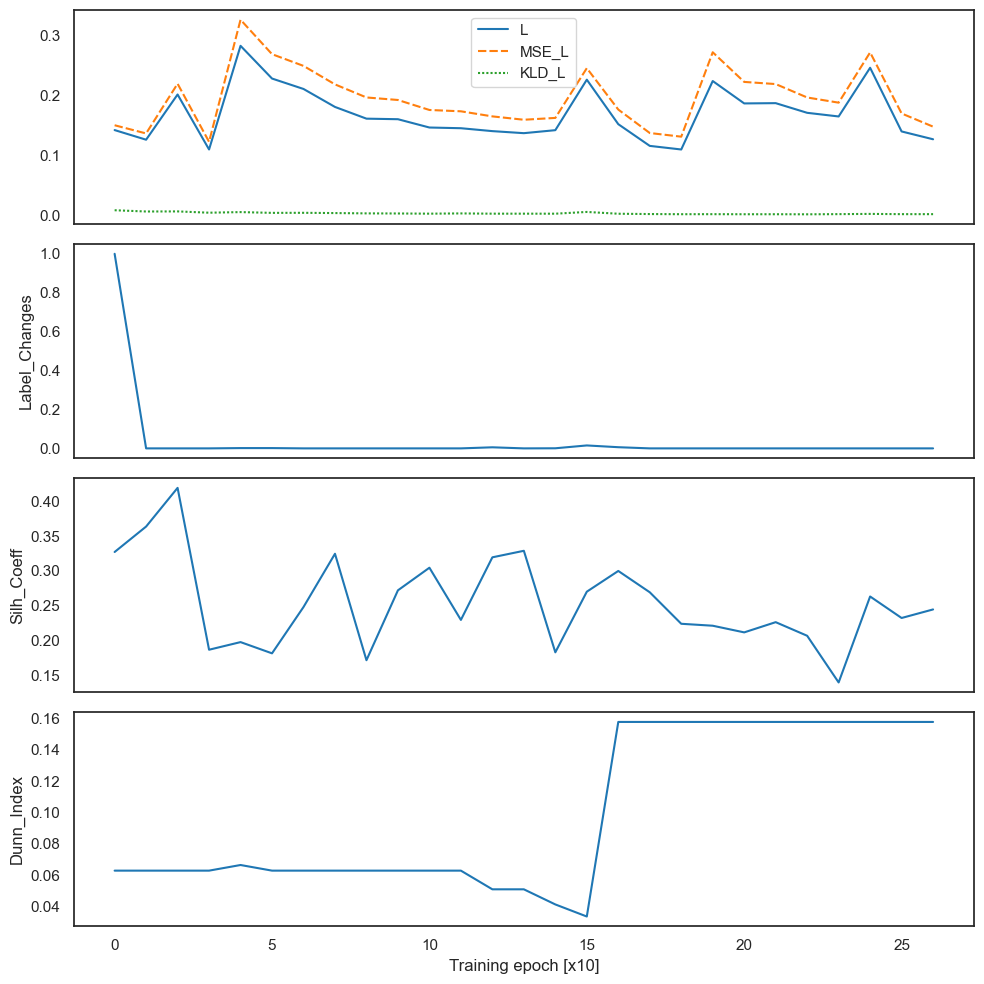

In [16]:
dec_model.plot_log_evaluation(LOG_DIR / "20250104 15_40_29 DEC LOG.csv", smoothing_window=1)

Display training progress animation:

In [17]:
visualization_dir = LOG_DIR / "250104_training_visualization"
gif_path = visualization_dir / "20250104 Animated Isomap Training Progress.gif"

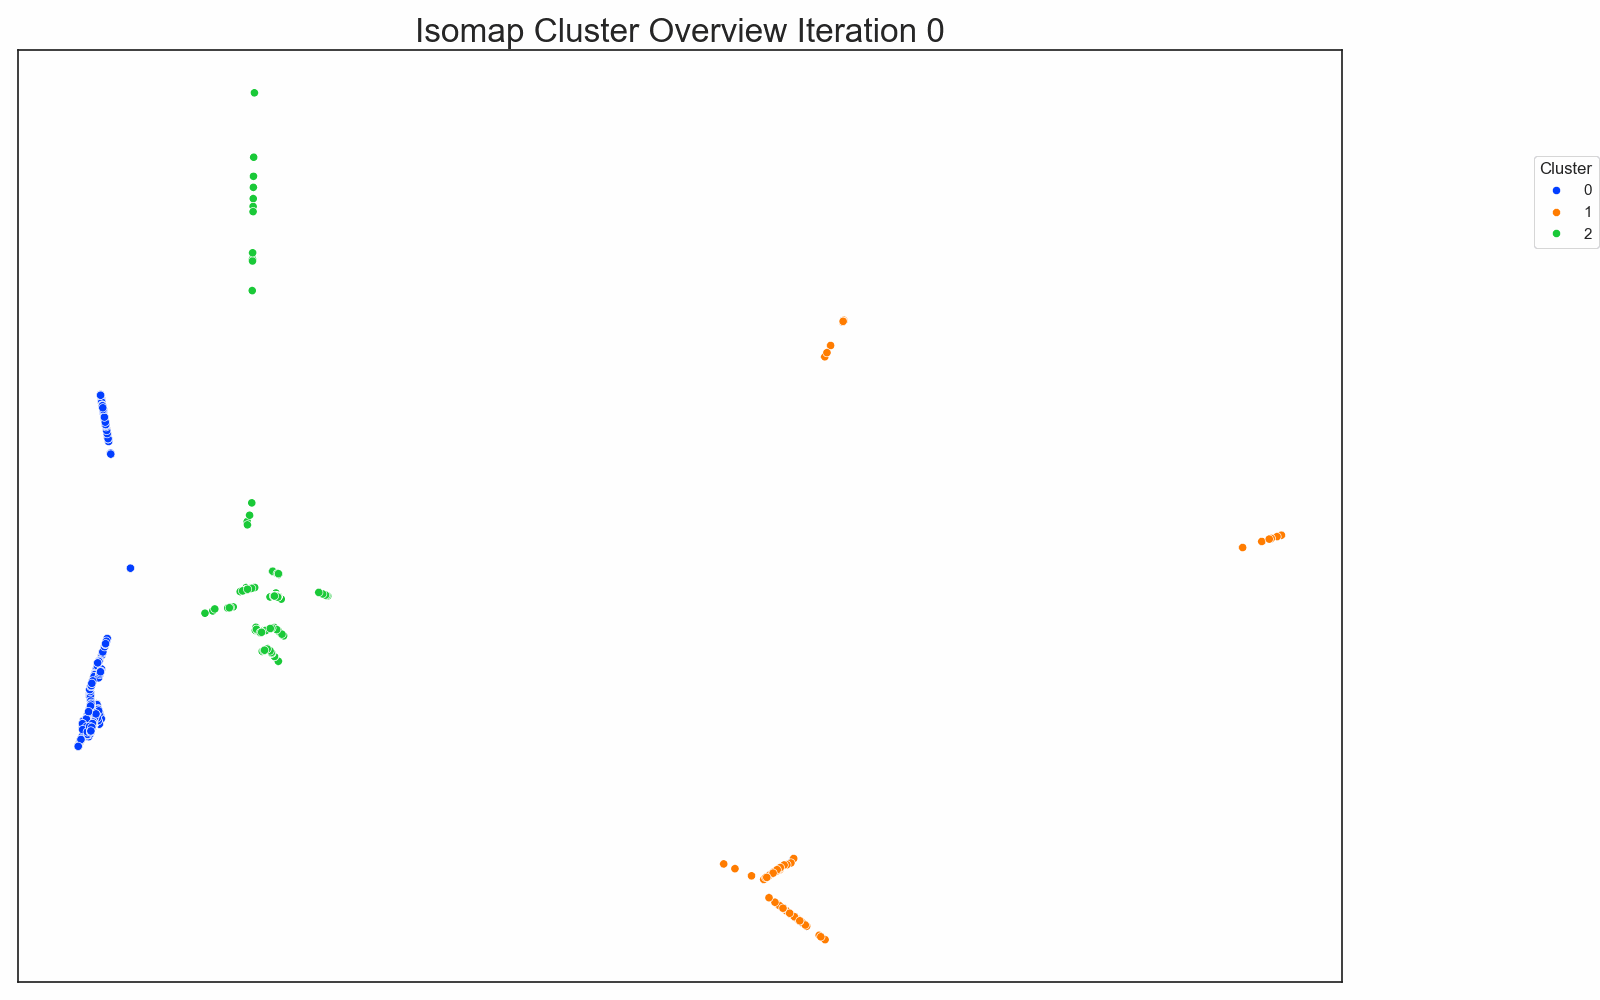

In [20]:
display(Image(data=open(gif_path, 'rb').read(), format='png'))